# Kotlovi i toplotne pumpe u BiH

Podaci o tehnologijama toplotnih pumpi i kotlova, proizvođačima, stepenu efikasnosti i kapacitetima preuzeti su sa portala https://ebrdgeff.com/ba/bs/ kao indikator opreme koja se koristi na tržištu. Ovi podaci su spašeni u dva .xlsx fajla: "Heat_pumps_final" i "Boilers". Sa web stranice je moguće unijeti i druge vrste opreme, ali se trenutno istraživanje svelo na ova dva tipa.  Toplotne pumpe se u ovom slučaju mogu razmatrati za niskotemperaturne režime grijanja u dobro-izoliranim objektima. Toplotne pumpe zrak-voda mogu preuzimati toplotu od zraka kada njegova temperatura ide i do temperatura ispod -20°C.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
cols=['Unnamed: 0','MANUFACTURER', 'Product Id','PRODUCT TYPE',"Unnamed: 4","Unnamed: 5",'Coefficient of Performance','Heating capacity [kW]','Cooling capacity [kW]', 'Seasonal Coefficient of Performance']

file=pd.read_excel(r"FILES\HEAT\Heat_pumps_final.xlsx",usecols="A:J",names=cols)

In [5]:
file.columns[0]

'Unnamed: 0'

Najprije će se učitati fajl koji se odnosi na toplotne pumpe. Kolona "Unnamed: 4" sadrži komentare. Ukupno je dostupno 1211 modela. Za sve modele je dat COP, a za 523/1211 dostupan i sezonski učinak - SCOP. Vrijednosti COP-a se kreću između 4.25 i 7.1 sa srednjom vrijedošću 4.79, dok SCOP za neke modele je označen sa 0, radi čega se to prikazuje kao minimalna vrijednost i na takav način umanjuju srednju vrijednost. Maksimalna vrijednost SCOP je 8. 75% podataka ima snagu grijanja do 142 kW, odnosno snagu hlađenja do 150 kW.

Sumarna statistika za numeričke kolone je data u idućoj tabeli. Podaci za grijanje se moraju prebaciti iz tekstualnog u numerički format te se nakon toga prikaz sumarne statistike ponavlja.

In [6]:
file.describe()

,Unnamed: 0,Product Id,Coefficient of Performance,Cooling capacity [kW],Seasonal Coefficient of Performance
count,1211.000000,1211.000000,1211.000000,981.000000,523.000000
mean,605.000000,12726.477291,4.788208,124.167965,4.143523
std,349.729896,11237.886776,0.540084,210.946325,1.222741
min,0.000000,613.000000,4.250000,0.000000,0.000000
25%,302.500000,3072.500000,4.400000,8.000000,3.950000
50%,605.000000,10358.000000,4.600000,15.000000,4.340000
75%,907.500000,26279.500000,5.000000,150.000000,4.745000
max,1210.000000,33069.000000,7.060000,982.000000,8.000000


In [7]:
numcols=['Heating capacity [kW]']
       #'Seasonal Coefficient of Performance']
for col in numcols:
    file[col]=file[col].str.replace(",","")
    file[col]=pd.to_numeric(file[col])

In [8]:
file.describe()

,Unnamed: 0,Product Id,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
count,1211.000000,1211.000000,1211.000000,1211.000000,981.000000,523.000000
mean,605.000000,12726.477291,4.788208,155.649075,124.167965,4.143523
std,349.729896,11237.886776,0.540084,306.269078,210.946325,1.222741
min,0.000000,613.000000,4.250000,2.700000,0.000000,0.000000
25%,302.500000,3072.500000,4.400000,9.050000,8.000000,3.950000
50%,605.000000,10358.000000,4.600000,15.100000,15.000000,4.340000
75%,907.500000,26279.500000,5.000000,142.000000,150.000000,4.745000
max,1210.000000,33069.000000,7.060000,1866.000000,982.000000,8.000000


Izgled prva četiri reda je dat u sljedećem prikazu.Kolona "Unnamed:5" će se izbaciti jer je ona višak.

In [9]:
file=file.drop(["Unnamed: 5","Unnamed: 0"],axis=1)

In [10]:
file.head(2)

,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
0,CIAT,32570,CIAT EREBA HE 15H,reversible heat pump equipped with DC inverter...,4.25,15.1,13.0,4.41
1,HITACHI,28846,HITACHI YUTAKI S 10,Heat pump SPLIT TYPE air to water,4.29,32.0,21.0,3.60


Iz informacija pruženih u koloni "Unnamed: 4" može se vidjeti da se na tržištu nude toplotne pumpe MONOBLOCK i SPLIT načina konfiguracije. MONOBLOCK toplotne pumpe se nalaze izvan objekta (kompresor i izmjenjivač toplote i vodena strana), odakle se topla voda ili mješavina vode i antifriza, nakon zagrijavanja, šalje prema objektu koji se grije. Ovakav tip toplotnih pumpi je jeftiniji i lakši za instalaciju. Nedostatak je priprema tople vode van objekta, što znači da veći utrošeni rad pumpe tokom zime s obzirom da može doći do hlađenja vode prije nego što dospije u grijani objekat.

Kod SPLIT jedinica toplota zraka se predaje gasnom mediju koji kao takav ulazi u objekat u unutrašnju jedinicu gdje predaje toplotu vodi koja se koristi za grijanje prostora i pripremu PTV. Kompresor i refrižerant se nalaze u vanjskoj jedinici, dok se IT, ekspanziona posuda i vodena strana ( i eventualno električni grijaći element) nalaze u unutrašnjoj. Kako se voda zagrijava u unutrašnjosti objekta, tako se smatra da se kod SPLIT sistema utroši manji rad. Također, vanjska jedinica može biti udaljena i do 50 m od objekta sa malim toplotnim gubicima.


Među modelima se nalazi i toplotna pumpa sa inverterom, što ima veze sa efikasnošću rada toplotne pumpe i frekvencijom rada kompresora. Toplotnim pumpama sa inverterom se prednost daje u vidu veće sveukupne energetske efikasnosti na godišnjem nivou, dužeg životnog vijeka toplotne pumpe i komfora. Razlika između toplotne pumpe sa fiksnim izlazom i sa inverterskom tehnolgijom leži u načinu dobavljanja energije u skladu sa termalnim zahtjevima objekta. Toplotna pumpa sa fiksnim izlazom radi kontinuirano na 100% kapaciteta kako bi ispunila potrebe za toplotom objekta. Takav rad se nastavlja sve dok se ne postigne željena temperatura, nakon čega se smjenjuu ciklusi paljenja  i gašenja u procesu održavanja zahtijevane temperature. Toplotna pumpa sa inverterom koristi kompresor promjenjive snage koji modifikuje izlaznu energiju na način da odgovara potrebama za toplotom uzimajući u obzir promjenu temperature zraka. Kada su potrebe za toplotom male, toplotna pumpa smanjuje izlaznu energiju, ograničava potrošnju električne energije i broj start - stop ciklusa, te stabilnije snabdijevanje električnom energijom. Npr. ukoliko potrebe za grijanjem iznose 15 kW na projektnoj minimalnoj temperaturi od -3°C, toplotna pumpa sa fiksnim izlazom će na izlazu imati 15 kW neovisno o vanjskoj temperaturi. Ovo se smatra neefikasnim jer će potrebe na temperaturi od 2°C iznositi manje, npr. 10 KW. Jedinica sa inverterom pruža izlaz u opsegu od (30-100)% maksimalnog kapaciteta. To znači da ako potrebe iznose 15 kW, instalirat će se toplotna pumpa inverterskog tipa u opsegu (5-15)kW, što znači da će pri najmanjim potrebama za grijanjem toplotma pumpa raditi kapacitetom od 5 KW, a ne sa 15 KW kao što je u slučaju fiksnog izlaza. 

Toplotna pumpa sa inverterom radi na način da fluktuacije temperature drži na minimumu, dok toplotna pumpa sa fiksnim izlazom vrši cikluse između maksimalnog kapaciteta i nule, te se do željene temperature dolazi nakon većeg broja ovih ciklusa. Također, tu je i ušteda prostora, s obzirom da se kod toplotnim pumpi sa stalnim izlazom instalira i rezervoar koji ima svru i predgrijavanja vode za slučaj više prostroija koje se ne griju na istoj temperaturi. 


SCOP nije prikazan ili je dat kao nulta vrijednost za pojedine toplotne pumpe (ukupno 32).

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


<ipython-input-11-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [12]:
len(file[file["Seasonal Coefficient of Performance"]==0])

32

In [13]:
file[(file["Seasonal Coefficient of Performance"]==0)|(file["Seasonal Coefficient of Performance"]==np.NaN)] #

,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
16,SIRAC,10508,SIRAC LSQ25R,Sirac low-temperature integrated heat pump,4.30,75.0,0.0,0.0
17,SIRAC,10507,SIRAC LSQ20R,Sirac low-temperature integrated heat pump,4.30,65.0,0.0,0.0
18,SIRAC,10506,SIRAC LSQ15R,Sirac low-temperature integrated heat pump,4.30,39.0,0.0,0.0
19,SIRAC,10505,SIRAC LSQ10R,Sirac low-temperature integrated heat pump,4.30,32.0,0.0,0.0
20,SIRAC,10504,SIRAC LSQ06RC,Sirac low-temperature integrated heat pump,4.30,18.0,0.0,0.0
21,SIRAC,10503,SIRAC LSQ05RC,Sirac low-temperature integrated heat pump,4.30,16.5,0.0,0.0
22,SIRAC,10502,SIRAC LSQ04RC,Sirac low-temperature integrated heat pump,4.30,11.9,0.0,0.0
23,SIRAC,10501,SIRAC LSQ03RC,Sirac low-temperature integrated heat pump,4.30,10.3,0.0,0.0
33,RUIDONG,10486,RUIDONG RLSFW010R,Ruidong Mini type air cooled heat pump,4.30,10.3,10.0,0.0
39,KELING,10468,KELING FM-180R,Keling Screw compressor Air-water,4.30,188.0,170.0,0.0


Najveći broj toplotnih pumpi ima kapacitet grijanja do 200 kW, dim da kod pojedinih kapacitet grijanja ide do 1400 kW.Najveći broj posmatranih toplotnih pumpi ima kapacitet hlađenja do 100 kW,manji broj do 200 kW, uz velika postrojenja do 900 kW.

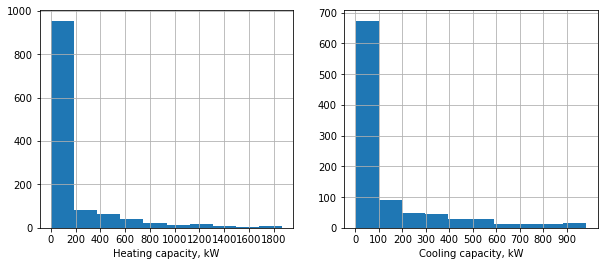

In [14]:
fig, ax=plt.subplots(ncols=2, figsize=(10,4))


file["Heating capacity [kW]"].hist(ax=ax[0])
ax[0].set_xticks(np.arange(0,2000,200))
ax[0].set_xlabel("Heating capacity, kW")

file[file["Cooling capacity [kW]"]!=0]["Cooling capacity [kW]"].hist(ax=ax[1])
ax[1].set_xticks(np.arange(0,1000,100))
ax[1].set_xlabel("Cooling capacity, kW")


plt.show()

Gledajući koeficijent učinka, on se za najveći broj modela kreće u vrijednostima od 4.2 do 4.8. Najveći broj toplotnih pumpi za koje su dostupni podaci imaju SCOP između 3.5 i 5.5. Ekstremne vrijednosti nastaju nakon (300-350) kW za oba moda. 

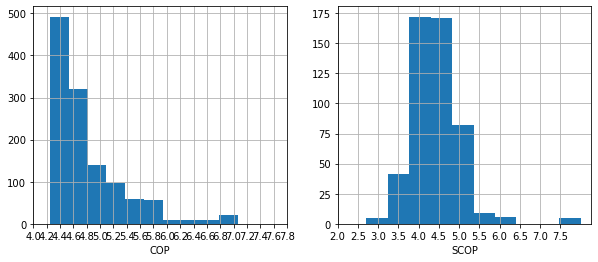

In [15]:
fig, ax=plt.subplots(ncols=2, figsize=(10,4))


file["Coefficient of Performance"].hist(ax=ax[0])
ax[0].set_xticks(np.arange(4,8,0.2))
ax[0].set_xlabel("COP")


file[file["Seasonal Coefficient of Performance"]!=0]["Seasonal Coefficient of Performance"].hist(ax=ax[1])
ax[1].set_xticks(np.arange(2,8,0.5))
ax[1].set_xlabel("SCOP")
plt.show()


Text(0.5, 1.0, 'COP')

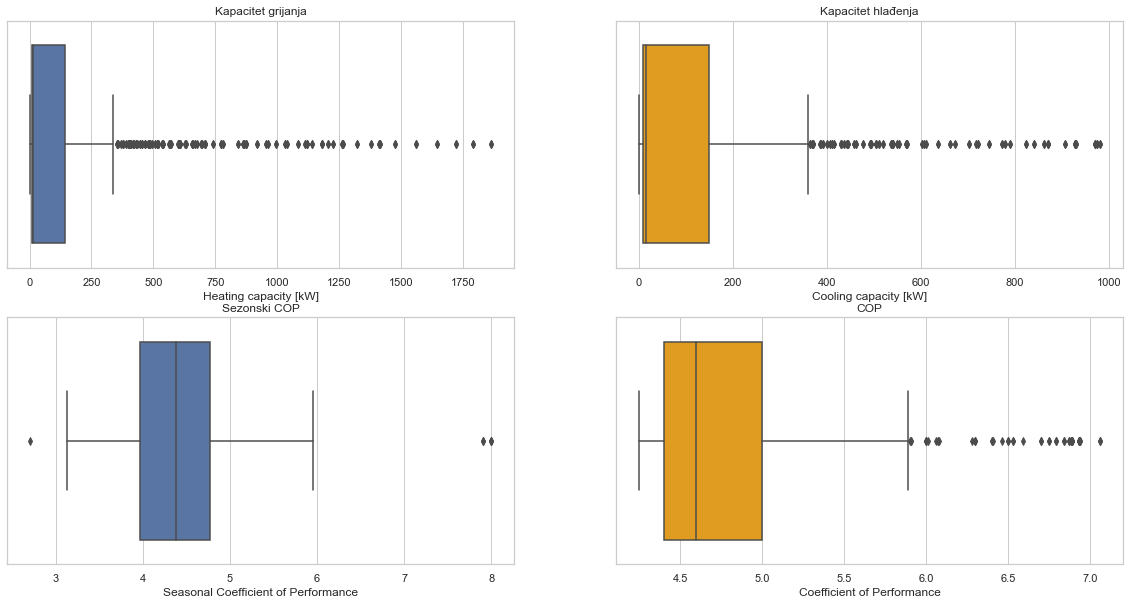

In [16]:
sns.set_theme(style="whitegrid")
fig, ax=plt.subplots(nrows=2,ncols=2, figsize=(20,10))

sns.boxplot(x=file["Heating capacity [kW]"],ax=ax[0,0])
ax[0,0].set_title("Kapacitet grijanja")

ax[0,1] = sns.boxplot(x=file["Cooling capacity [kW]"],ax=ax[0,1],color="orange")
ax[0,1].set_title("Kapacitet hlađenja")


sns.boxplot(x=file[file["Seasonal Coefficient of Performance"]!=0]["Seasonal Coefficient of Performance"],ax=ax[1,0])
ax[1,0].set_title("Sezonski COP")

ax[1,1] = sns.boxplot(x=file["Coefficient of Performance"],ax=ax[1,1],color="orange")
ax[1,1].set_title("COP")


Maksimalni SCOP u vrijednosti od 8  je zabilježen kod proizvođača HOVAL toplotnih pumpi za grijanje i hlađenje objekata kapaciteta grijanja (8.60 - 15.24)kW sa integrisanim rezervoarom i varijabilnim izlazom u toku godine.

In [17]:
file[file["Seasonal Coefficient of Performance"]==file["Seasonal Coefficient of Performance"].max()]

,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
1176,HOVAL,29650,HOVAL ULTRASOURCE T COMPACT (13/200),Modulating heat pump system for heating and cooling in the living area.,6.30,8.60,NaN,8.0
1177,HOVAL,29649,HOVAL ULTRASOURCE T COMFORT (13),Modulating heat pump system for heating and cooling in the living area.,6.30,8.60,NaN,8.0
1181,HOVAL,29651,HOVAL ULTRASOURCE T COMFORT (17),Modulating heat pump system for heating and cooling in the living area.,6.46,15.24,NaN,8.0


Minimalni SCOP je zabilježen kod proizvođača FUJITSU za split sistem sa toplotnim učinkom od 8 kW i iznosi 2.71. Pritom COP iznosi 4.5 što je značajno veće.

In [18]:
file[file["Seasonal Coefficient of Performance"]==file[file["Seasonal Coefficient of Performance"]!=0]["Seasonal Coefficient of Performance"].min()]

,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
422,FUJITSU,30820,WATERSTAGE HP DUO 14,Split Type High Power Series WGYG140DG6 / WOYG140LCTA WATERSTAGE AIR-TO-WATER system is an economical and clean water heating system that uses heat pump technology,4.5,8.0,NaN,2.71


Kada je riječ o radnim medijima, posmatrat  će se oni čiji je SCOP različit od nule. Za neke toplotne pumpe se mogu vidjeti radni mediji, te će se izvršiti selekcija na one koji rade kao zrak - voda (146) i tlo - voda (8), te djelimična selekcija na one zrak - zrak (20).

In [19]:
file_scop=file[file["Seasonal Coefficient of Performance"]>0]

file_air=file_scop[file_scop["Unnamed: 4"].str.contains("zrak|air",case=False)]

zrak - voda:

In [20]:
file_air_water=file_air[file_air["Unnamed: 4"].str.contains("water|voda|brine",case=False)]


In [21]:
print("Zrak - voda,  broj:",len(file_air_water))
file_air_water.head(2)


Zrak - voda,  broj: 146


,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
1,HITACHI,28846,HITACHI YUTAKI S 10,Heat pump SPLIT TYPE air to water,4.29,32.0,21.0,3.60
3,FUJITSU,30818,WATERSTAGE HP 11T,Split Type High Power Series WSYK160DG9 / WOYK112LCTA WATERSTAGE AIR-TO-WATER system is an economical and clean water heating system that uses heat pump technology,4.30,11.0,NaN,3.17


zrak - zrak 

In [22]:
file_air_air=file_air[file_air["Product Id"].isin(file_air_water["Product Id"]) ==False]

In [23]:
print("Zrak-zrak broj:",len(file_air_air))

Zrak-zrak broj: 20


zemlja - voda

In [26]:
file_ground_water=file_scop[file_scop["Unnamed: 4"].str.contains("zemlja|earth",case=False)]

In [28]:
print("Tlo - voda broj:",len(file_ground_water))
file_ground_water.head(3)

Tlo - voda broj: 8


,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
552,CTC,32186,"CTC ECOPART 425 PRO, 400 V 3N",CTC toplotna pumpa zemlja/voda ili voda/voda,4.58,24.0,NaN,4.80
553,CTC,32185,"CTC ECOPART 425, 400 V 3N",CTC toplotna pumpa zemlja/voda ili voda/voda,4.58,24.0,NaN,4.80
891,CTC,32183,"CTC ECOPART 414, 400 V 3N",CTC toplotna pumpa zemlja/voda ili voda/voda,4.95,14.0,NaN,4.95


In [29]:
file_air_water.loc[:,"Medij"]="Z-V"
file_ground_water.loc[:,"Medij"]="T-V"
file_air_air.loc[:,"Medij"]="Z-Z"

C:\Users\Ehlimana\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Ehlimana\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Nakon što se izvršila klasifikacija po radnim medijima, pojedinačni setovi će se opet spojiti u jedan veliki.

In [30]:
file_tot=pd.concat([file_air_water,file_ground_water,file_air_air],axis=0)

In [31]:
file_tot.head(2)

,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance,Medij
1,HITACHI,28846,HITACHI YUTAKI S 10,Heat pump SPLIT TYPE air to water,4.29,32.0,21.0,3.60,Z-V
3,FUJITSU,30818,WATERSTAGE HP 11T,Split Type High Power Series WSYK160DG9 / WOYK112LCTA WATERSTAGE AIR-TO-WATER system is an economical and clean water heating system that uses heat pump technology,4.30,11.0,NaN,3.17,Z-V


Očekivani, najveći SCOP imaju toplotne pumpe tlo - voda radi stabilnije temperature tla tokom godine.

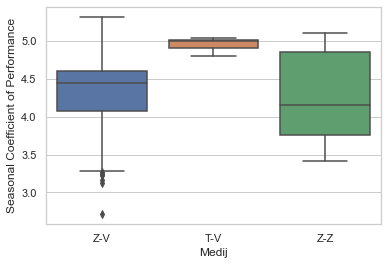

In [32]:
x = sns.boxplot(x="Medij", y="Seasonal Coefficient of Performance",
                 data=file_tot)

Toplotne pumpe tlo - voda su uglavnom primjetne kod kapaciteta grijanja do 30 KW, dok veće kapacitete pokrivaju uglvnom pumpe zrak - voda. 

<AxesSubplot:xlabel='Cooling capacity [kW]', ylabel='Seasonal Coefficient of Performance'>

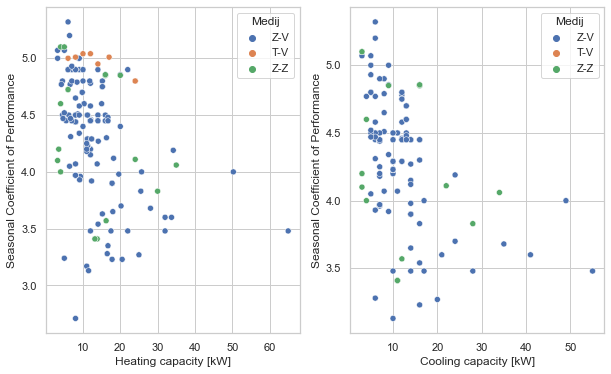

In [33]:
fig, ax=plt.subplots(ncols=2, figsize=(10,6))

sns.scatterplot(
    data=file_tot,
    x="Heating capacity [kW]", y="Seasonal Coefficient of Performance",
    hue="Medij",ax=ax[0])


sns.scatterplot(
    data=file_tot,
    x="Cooling capacity [kW]", y="Seasonal Coefficient of Performance",
    hue="Medij",ax=ax[1])

# Kotlovi - analiza

Za analizu tržišta kotlova uzeta su 524 kotla iz baze od različitih proizvođača.

In [34]:
file_boiler=pd.read_excel(r"FILES\HEAT\BoilerS.xlsx",header=0)

In [35]:
file_boiler.shape
file_boiler.head(3)

,Unnamed: 0,MANUFACTURER,Product Id,PRODUCT TYPE,Type,Thermal Efficiency [%],Combustion technology,Capacity [kW],Output,Fuel,Efficiency label,Unnamed: 11,Boiler
0,0,CENTROMETAL,1849,CENTROMETAL CENTROPELET Z 6,"Centrometal wood pellet stove, 5.5kW, type Centrometal CentroPelet Z 6",90,STANDARD,5.50,Heat,BIOMASS,NaN,NaN,NaN
1,1,THERMOFLUX,31184,PELLET STOVE ADELE 6,Pellet stoves,90,ATMOSPHERIC,6.00,Heat,NaN,A++,NaN,NaN
2,2,ALFA-PLAM,32930,ALFA 90 PELET,Pellet stove,86,ATMOSPHERIC,8.00,Heat,NaN,A+,NaN,NaN


Kotlovi iz baze koriste biomasu i gas. Za pojedine kotlove kolona koja označava gorivo je prazna, te, ukoliko se u opisu nalazi pelet, tom kotlu će se kao gorivo dodati oznaka biomas2. Inače, u nekim slučajevima se koristi i drvna sječka. Ove dvije vrste goriva će se spojiti u jednu koja će se odnositi na biomasu.

In [36]:
file_boiler.loc[file_boiler["Unnamed: 11"].str.contains("pellet",case=False,na=False),"Fuel"]="BIOMASS"
file_boiler.loc[file_boiler["Fuel"]=="BIOMASS (PELLETS)","Fuel"]="BIOMASS"

file_boiler.loc[file_boiler["Type"].str.contains("pellet",case=False,na=False),"Fuel"]="BIOMASS"
file_boiler.loc[file_boiler["PRODUCT TYPE"].str.contains("pellet",case=False,na=False),"Fuel"]="BIOMASS"
file_boiler.loc[file_boiler["Unnamed: 11"].str.contains("combined|wood",case=False,na=False),"Fuel"]="BIOMASS"

In [37]:
#drvna sječka #prva 3 reda
file_boiler[file_boiler["Unnamed: 11"].str.contains("wood chip",case=False,na=False)].head(3)

,Unnamed: 0,MANUFACTURER,Product Id,PRODUCT TYPE,Type,Thermal Efficiency [%],Combustion technology,Capacity [kW],Output,Fuel,Efficiency label,Unnamed: 11,Boiler
392,392,CENTROMETAL,1856,CENTROMETAL EKO-CKS MULTI PLUS 170,NaN,91,STANDARD,170.00,Heat,BIOMASS,A+,"Centrometal wood chip boiler, 170kW, type Centrometal EKO-CKS Multi Plus 170",NaN
405,405,CENTROMETAL,1857,CENTROMETAL EKO-CKS MULTI PLUS 250,NaN,91,STANDARD,250.00,Heat,BIOMASS,A+,"Centrometal wood chip boiler, 250kW, type Centrometal EKO-CKS Multi Plus 250",NaN
415,415,CENTROMETAL,1858,CENTROMETAL EKO-CKS MULTI PLUS 340,NaN,92,STANDARD,340.00,Heat,BIOMASS,A+,"Centrometal wood chip boiler, 340kW, type Centrometal EKO-CKS Multi Plus 340",NaN


U navedenom setu 61% kotlova kao gorivo koristi biomasu, a 39% gas.

<AxesSubplot:ylabel='Fuel'>

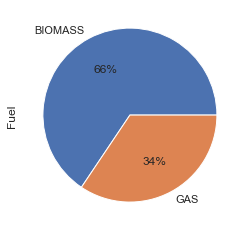

In [38]:
file_boiler.groupby(["Fuel"])["Fuel"].count().plot(kind='pie', autopct='%1.0f%%',)

In [39]:
file_boiler["Capacity [kW]"]=file_boiler["Capacity [kW]"].str.replace(",","")

In [40]:
file_boiler["Capacity [kW]"]=pd.to_numeric(file_boiler["Capacity [kW]"])

Minimalna efikasnost kotla je 85%, a maksimalna 11% uz srednju vrijednost od 95% uz značajnu standardnu devijaciju. Minimalna snaga kotla je 5.5 kW,a maksimalna 12 000 kW. 75% kotlova je ispod 100 kW.

In [41]:
file_boiler.describe()

,Unnamed: 0,Product Id,Thermal Efficiency [%],Capacity [kW],Boiler
count,524.000000,524.000000,524.000000,524.000000,0.0
mean,261.500000,16884.585878,94.975191,382.425382,NaN
std,151.410039,11779.816617,7.110259,1285.995851,NaN
min,0.000000,357.000000,85.000000,5.500000,NaN
25%,130.750000,3020.750000,90.000000,21.425000,NaN
50%,261.500000,18390.500000,92.000000,30.000000,NaN
75%,392.250000,29152.250000,97.000000,100.000000,NaN
max,523.000000,33071.000000,111.000000,12000.000000,NaN


Pojedini kotlovi se sastoje iz dva dijela - sistema za gasifikaciju drveta i dijela za sagorijevanje peleta,čime se omogućava veći izbor goriva za korištenje-kombinacija ili individualno, uz povećanje efikasnosti.

In [42]:
print("Ukupno gasifikacija drveta + pelet:",file_boiler.shape[0])
file_boiler[file_boiler["Unnamed: 11"].str.contains("combined",case=False,na=False)].head(2)

Ukupno gasifikacija drveta + pelet: 524


,Unnamed: 0,MANUFACTURER,Product Id,PRODUCT TYPE,Type,Thermal Efficiency [%],Combustion technology,Capacity [kW],Output,Fuel,Efficiency label,Unnamed: 11,Boiler
130,130,RIELLO/BERETTA S.P.A,31071,MYNUTE BERETTA 20 C.S.I.,NaN,91,ATMOSPHERIC,21.2,Heat,BIOMASS,A+,Combined flow wall boiler with closed chamber and forced discharge of combustion products facade - methaneIt consists of 4 versions,NaN
144,144,RIELLO/BERETTA S.P.A,31072,MYNUTE BERETTA 24 C.S.I.,NaN,91,ATMOSPHERIC,24.0,Heat,BIOMASS,A+,Combined flow wall boiler with closed chamber and forced discharge of combustion products facade - methaneIt consists of 4 versions,NaN


Gledajući vrstu goriva, kotlovi na gas (kondenzacijski kotlovi) očekivano imaju veći stepen efikasnosti radi hlađenja dimnih gasova do temperature na kojoj se dešava kondenzacija vodene pare.Međutim kotlovi na gas imaju i veću standardnu devijaciju, te će se obratiti pažnja koja vrsta kotlova je u pitanju.

In [43]:
print("Srednja vrijednost")
print(file_boiler.groupby("Fuel")["Thermal Efficiency [%]"].mean())
print("Standardna devijacija")
print(file_boiler.groupby("Fuel")["Thermal Efficiency [%]"].std(ddof=0))

Srednja vrijednost
Fuel
BIOMASS    91.042904 
GAS        101.836478
Name: Thermal Efficiency [%], dtype: float64
Standardna devijacija
Fuel
BIOMASS    2.410403
GAS        7.169006
Name: Thermal Efficiency [%], dtype: float64


Text(0.5, 0, 'Thermal efficiency, %')

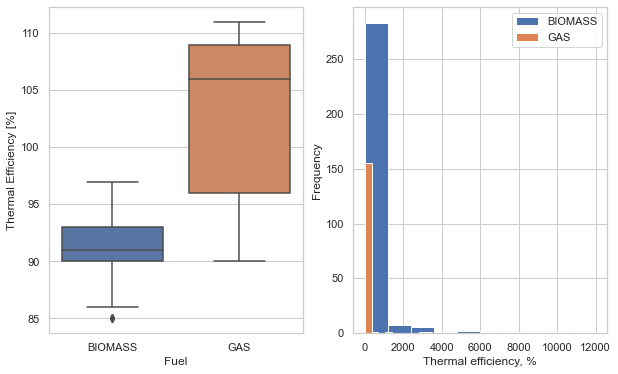

In [56]:
fig, ax=plt.subplots(ncols=2, figsize=(10,6))
x = sns.boxplot(x="Fuel", y="Thermal Efficiency [%]",
                 data=file_boiler,ax=ax[0])

file_boiler.groupby("Fuel")["Capacity [kW]"].plot(kind="hist",ax=ax[1])
ax[1].legend()
ax[1].set_xlabel("Thermal efficiency, %")

Efikasnost kotlova na biomasu bez obzira na snagu je u rangu između cca.a 85% i 95%, dok se za gas efikasnost grupiše oko vrijednosti od 95%, te u drugom dijeli između 105% i 110%.

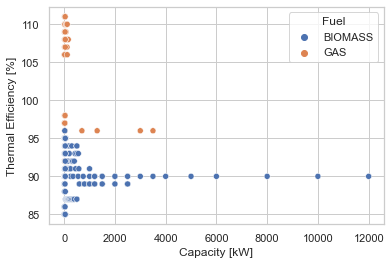

In [45]:
x = sns.scatterplot(x="Capacity [kW]", y="Thermal Efficiency [%]",hue="Fuel",
                 data=file_boiler)

Većina kotlova na biomasu je snage do 1000 kW, a većina kotlova na gas je snage do 300 kW.

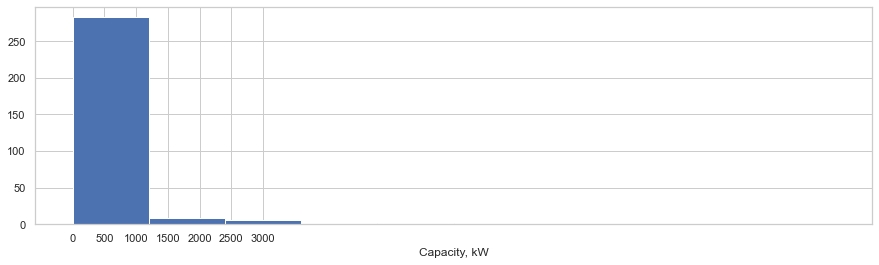

In [46]:
file_boiler[file_boiler["Fuel"]=="BIOMASS"]["Capacity [kW]"].hist(figsize=(15,4))
plt.xticks(np.arange(0,3500,500))
plt.xlabel("Capacity, kW")
plt.show()


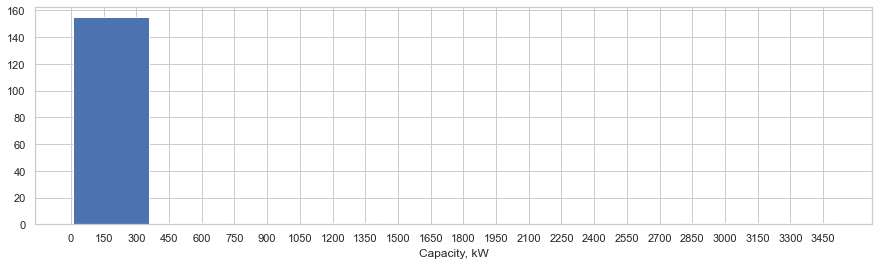

In [47]:
file_boiler[file_boiler["Fuel"]=="GAS"]["Capacity [kW]"].hist(figsize=(15,4))
plt.xticks(np.arange(0,3500,150))
plt.xlabel("Capacity, kW")
plt.show()

In [48]:
file_boiler[file_boiler["Capacity [kW]"]==file_boiler["Capacity [kW]"].max()]

,Unnamed: 0,MANUFACTURER,Product Id,PRODUCT TYPE,Type,Thermal Efficiency [%],Combustion technology,Capacity [kW],Output,Fuel,Efficiency label,Unnamed: 11,Boiler
497,497,TOPLING,14499,KPR 12000,NaN,90,ATMOSPHERIC,12000.0,Heat,BIOMASS,A,System for automatic combustion of the biomass,NaN
498,498,TOPLING,414,KPR 12000,NaN,90,NaN,12000.0,Heat,NaN,A+,System for automatic combustion of the biomass,NaN


In [49]:
file_boiler[file_boiler["Capacity [kW]"]==file_boiler["Capacity [kW]"].min()]

,Unnamed: 0,MANUFACTURER,Product Id,PRODUCT TYPE,Type,Thermal Efficiency [%],Combustion technology,Capacity [kW],Output,Fuel,Efficiency label,Unnamed: 11,Boiler
0,0,CENTROMETAL,1849,CENTROMETAL CENTROPELET Z 6,"Centrometal wood pellet stove, 5.5kW, type Centrometal CentroPelet Z 6",90,STANDARD,5.5,Heat,BIOMASS,NaN,NaN,NaN


Što se tiče tehnologije sagorijevanja, dato je nekoliko grupa:

In [50]:
file_boiler["Combustion technology"].unique()

array(['STANDARD', 'ATMOSPHERIC', 'CONDENSING', 'LOW TEMPERATURE', nan],
      dtype=object)

<AxesSubplot:ylabel='Combustion technology'>

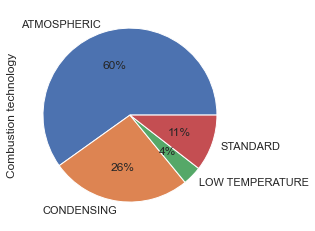

In [51]:
file_boiler.groupby(["Combustion technology"])["Combustion technology"].count().plot(kind='pie', autopct='%1.0f%%',)

In [52]:
file_boiler.groupby("Combustion technology")["Thermal Efficiency [%]"].mean()

Combustion technology
ATMOSPHERIC        93.371930 
CONDENSING         102.629032
LOW TEMPERATURE    93.411765 
STANDARD           91.060000 
Name: Thermal Efficiency [%], dtype: float64

Korelacija između kapaciteta i efikasnosti je negativna, ali i mala,što ne ukazuje na značajan linearni odnos između ove dvije varijable.

In [53]:
file_boiler["Capacity [kW]"].corr(file_boiler["Thermal Efficiency [%]"])

-0.17478606909036334

<AxesSubplot:xlabel='Capacity [kW]', ylabel='Thermal Efficiency [%]'>

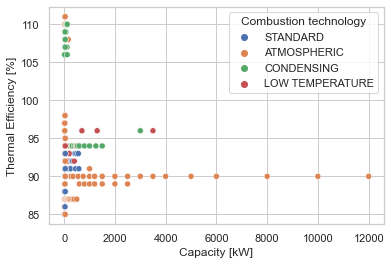

In [54]:
sns.scatterplot(
    data=file_boiler,
    x="Capacity [kW]", y="Thermal Efficiency [%]",
    hue="Combustion technology")